In [37]:
include("model.jl")
include("make_diff_op.jl")
include("make_projection_op.jl")
include("make_source_vec.jl")
include("draw_figure.jl")
include("compute_gradient.jl")

compute_gradient_penalty (generic function with 1 method)

In [2]:
Nx = 51; Ny = 51;
dx = 20; dy = 20;
pml_len = 5;
Nx_pml = Nx + 2*pml_len;
Ny_pml = Ny + 2*pml_len;
# coor_source = [10 10; 10 15];
# source = [-1, -1];

# coor_receiver = ones(Int, 2, 2);
# coor_receiver[1,1] = 60;
# coor_receiver[1,2] = 60;
# coor_receiver[2,1] = 70;
# coor_receiver[2,2] = 60;

coor_source = ones(Int, 51, 2);
source = -1 .* ones(51);

for i = 1:51
    coor_source[i,1] = i;
    coor_source[i,2] = 2;
end

coor_receiver = ones(Int,51, 2);
for i = 1:51
    coor_receiver[i,1] = i;
    coor_receiver[i,2] = 50;
end

model = Model(Nx, Ny, dx, dy, coor_source, source, coor_receiver, pml_len);

vel0 = 2000*ones(model.Nx, model.Ny);
vel = 2000*ones(model.Nx, model.Ny);
vel[21:31, 21:31] .= 2100;
vel0_ex = extend_vel(vel0, model);
vel_ex = extend_vel(vel, model);

vel_ex = reshape(vel_ex, Nx_pml*Ny_pml)
vel0_ex = reshape(vel0_ex, Nx_pml*Ny_pml);

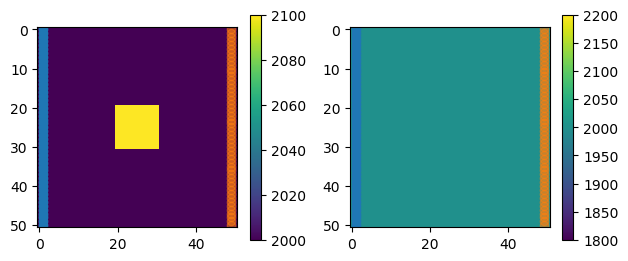

In [3]:
draw_model2(vel_ex, vel0_ex, model, vertial=false)

In [4]:
include("lbfgsb_fwi.jl")
lower = 2000;
upper = 2200;
fre_vec = [5, 10];
res = lbfgsb_fwi(vel_ex, vel0_ex, model, fre_vec, lower, upper; iterTime=10);

Frequency content is: [5 10]
Frequency is: 5 Hz
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3721     M =            5

At X0      3721 variables are exactly at the bounds

At iterate    0    f=  1.63176D+04    |proj g|=  7.76503D+01

At iterate    1    f=  3.08692D+03    |proj g|=  2.34910D+01

At iterate    2    f=  1.92610D+03    |proj g|=  1.45990D+01

At iterate    3    f=  1.00995D+03    |proj g|=  8.56861D+00

At iterate    4    f=  6.44535D+02    |proj g|=  5.58218D+00

At iterate    5    f=  4.52964D+02    |proj g|=  3.85345D+00

At iterate    6    f=  2.74360D+02    |proj g|=  2.54318D+00

At iterate    7    f=  1.50812D+02    |proj g|=  2.08426D+00

At iterate    8    f=  8.63351D+01    |proj g|=  1.89609D+00

At iterate    9    f=  2.73612D+01    |proj g|=  1.42744D+00

At iterate   10    f=  1.29603D+01    |proj g|=  1.01327D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnin

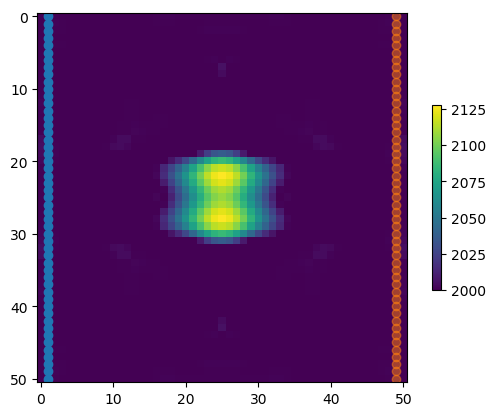

PyObject <matplotlib.collections.PathCollection object at 0x13fd15f98>

In [5]:
draw_model(res, model)

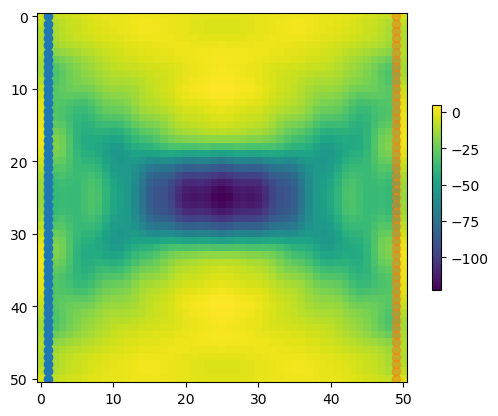

  0.382589 seconds (4.94 k allocations: 71.011 MiB, 3.51% gc time)


PyObject <matplotlib.collections.PathCollection object at 0x13fb1d940>

In [7]:
Pr = make_projection_op(model);

fre = 10;
A = make_diff_op(vel_ex, model, fre);

q = make_source_vec(model);

u = A \ q;
d = Pr * u;

@time f, g = compute_gradient_lbfgsb(vel0_ex, model, fre, d, q, Pr);
draw_model(g, model)

In [8]:
f

5588.348228284427

In [38]:
include("penalty_fwi.jl")
lambda = 1;
lower = 2000;
upper = 2200;
fre_vec = [5, 10];
res = penalty_fwi(vel_ex, vel0_ex, model, fre_vec, lower, upper, lambda; iterTime=5);

Frequency content is: [5 10]
Frequency is: 5 Hz
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3721     M =            5

At X0      3721 variables are exactly at the bounds

At iterate    0    f=  9.14095D-01    |proj g|=  4.49733D-07

At iterate    1    f=  9.14095D-01    |proj g|=  4.49733D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3721      1      2      1     0   172   4.497D-07   9.141D-01
  F =  0.91409487880709028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 1.450E-04 seconds.
 Subspace minimization time 0.000E+0

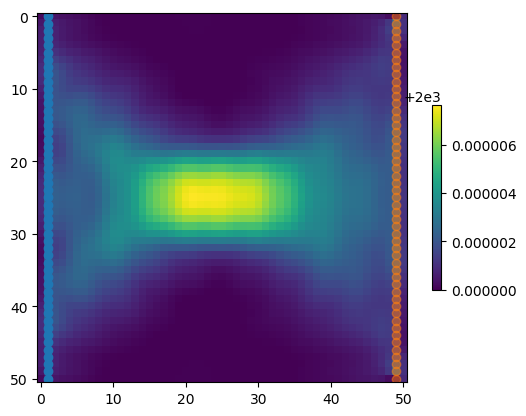

PyObject <matplotlib.collections.PathCollection object at 0x1413cb438>

In [39]:
draw_model(res,model)

In [29]:
 f, g = compute_gradient_penalty(vel0_ex, model, fre, d, q, Pr, lambda);

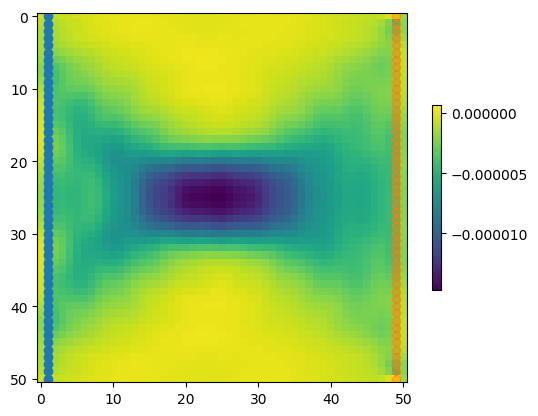

PyObject <matplotlib.collections.PathCollection object at 0x1406e0668>

In [27]:
draw_model(g, model)

In [28]:
f


0.0016176575571696958

In [ ]:
Pr = make_projection_op(model);

fre = 10;
A = make_diff_op(vel_ex, model, fre);

q = make_source_vec(model);

u = A \ q;
d = Pr * u;

In [ ]:
lambda = 1;
A = make_diff_op(vel0_ex, model, fre);
A_lambda = [lambda * A; Pr];
q_lamda = [lambda * q; d];

@time u_lambda = A_lambda \ q_lamda;

In [ ]:
draw_wavefield(u_lambda, model, index=26, ex_model=false)

In [ ]:
draw_model(real(u_lambda - u)[:,26], model, ex_model=false)

In [ ]:
v = A * u_lambda - q;

In [ ]:
draw_wavefield(v, model, index=26)

In [ ]:
g = real(sum(conj(u_lambda) .* (A * u_lambda - q), dims=2));

In [93]:
function compute_gradient_penalty(vel, model, fre, d, q, Pr, lambda)
    A = make_diff_op(vel, model, fre);
#     A_lambda = [lambda * A; Pr];
#     q_lamda = [lambda * q; d]; 
    A_lambda = lambda*(A'*A) + (Pr'*Pr);
    q_lambda = Pr'*d + lambda*A'*q;
    u_lambda = A_lambda \ q_lambda;
    v = A * u_lambda - q;
    g = real(sum(conj(u_lambda) .* v, dims=2));
    f = 0.5 * norm(real(Pr*real(u_lambda)-d))^2 + (lambda^2/2)*norm(real(v))^2;
    
    return f, g
end


compute_gradient_penalty (generic function with 1 method)

In [56]:
Pr = make_projection_op(model);

fre = 10;
A = make_diff_op(vel_ex, model, fre);

q = make_source_vec(model);

u = A \ q;
d = Pr * u;

In [85]:
lambda = 1;
@time f, g = compute_gradient_penalty(vel0_ex, model, fre, d, q, Pr, lambda)

  0.117156 seconds (12.16 k allocations: 52.252 MiB, 7.19% gc time)


(0.0007929712261070095, [7.20631e-5; 0.000433134; … ; 0.00114825; 0.000400618])

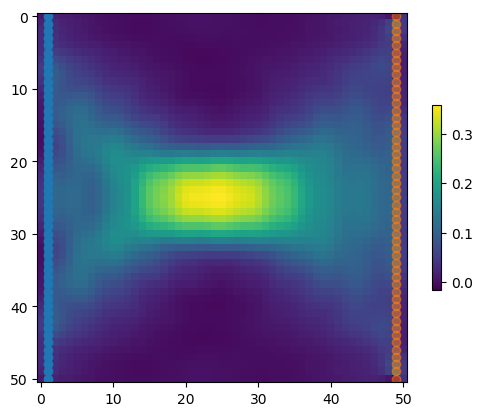

PyObject <matplotlib.collections.PathCollection object at 0x13be24b00>

In [61]:
draw_model(g, model)

In [82]:
function pivot_mat(model)
    coor_receiver = model.coor_receiver .+ model.pml_len;
    Nx_pml = model.Nx + 2*model.pml_len;
    Ny_pml = model.Ny + 2*model.pml_len;
    nr = size(coor_receiver,1);

    ii = 1:nr;
    jj = zeros(Int, 1,nr);
    for i = 1:nr
       jj[i] = coor_receiver[i,1]+(coor_receiver[i,2]-1)*Nx_pml;
    end
    kk = ones(1,nr);
    R = sparse(1I, Nx_pml*Ny_pml, Nx_pml*Ny_pml);
    for i = 1:nr
        temp = R[jj[i],:];
        R[jj[i],:] = R[i,:];
        R[i,:] = temp;
    end
    return nr, R
end

function compute_gradient_partial(vel, model, fre, d, q, Pr, Nr, R)
    
    lambda = 1;
    
    A0 = make_diff_op(vel0_ex, model, fre);
    A_temp = A0 * R';
    A1 = A_temp[:, 1:Nr];
    A2 = A_temp[:, Nr+1:end];
    q_temp = q - A1 * d;
#     u2 = A2 \ q_temp;
    u2 = (A2'*A2) \ (A2'*q_temp);
    u_temp = [d; u2];
    u0 = R' * u_temp;
    
    v = A0 * u0 - q;
    g = real(sum(conj(u0) .* v, dims=2));
    f = 0.5 * norm(real(Pr*real(u0)-d))^2 + (lambda^2/2)*norm(real(v))^2;
    
    return f, g
end

compute_gradient_partial (generic function with 1 method)

In [88]:
Nr, R = pivot_mat(model);
@time f, g = compute_gradient_partial(vel0_ex, model, fre, d, q, Pr, Nr, R);

  0.117717 seconds (23.17 k allocations: 57.550 MiB, 8.68% gc time)


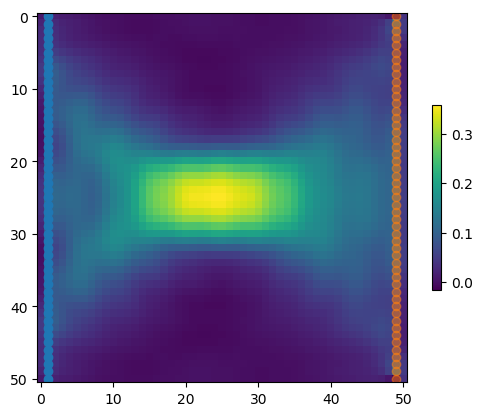

PyObject <matplotlib.collections.PathCollection object at 0x13cd03860>

In [89]:
draw_model(g, model)

In [ ]:
@time f,g = compute_gradient_lbfgsb(vel0_ex, model, fre, d, q, Pr)

In [ ]:
draw_model(g, model)

In [78]:
A0 = make_diff_op(vel0_ex, model, fre);
A_temp = A0 * R';
A1 = A_temp[:, 1:Nr];
A2 = A_temp[:, Nr+1:end];
q_temp = q - A1 * d;
@time u2 = (A2'*A2) \ (A2'*q_temp);
@time uu2 = A2\ (q_temp);

  0.091761 seconds (11.10 k allocations: 26.343 MiB, 4.83% gc time)
  4.188402 seconds (465.90 k allocations: 60.644 MiB, 0.17% gc time)


In [79]:
@time uu = A0 \ q;

  0.176410 seconds (357 allocations: 28.034 MiB, 2.44% gc time)


In [81]:
maximum(abs)

1.2952853569180512e-10

In [ ]:
u_temp = [d; u2];
u0 = R' * u_temp;

$A(m) R^T R u_\lambda$

In [ ]:
draw_wavefield(u0-u, model, index=26)

In [ ]:
71 * 71

In [ ]:
ii = 1:size(model.coor_receiver,1)

In [ ]:
jj = zeros(1,size(model.coor_receiver,1))

In [ ]:
model_size = Nx_pml * Ny_pml;
for i = 1:size(model.coor_receiver,1)
   jj[i] = model.coor_receiver[i,1]+(model.coor_receiver[i,2]-1)*Nx_pml;
end

In [ ]:
kk = ones(1,size(model.coor_receiver,1));

In [ ]:
R = speye(Nx_pml*Ny_pml);

In [ ]:
for i = 1:size(coor_receiver,1)
    temp = R(jj(i),:);
    R(jj(i),:) = R(i,:);
    R(i,:) = temp;
end

In [ ]:
A = [1 2 ;3 4]
norm(A)^2

In [ ]:
1^2 + 2^2 + 3^2 + 4^2

In [ ]:
    Nx_pml = model.Nx + 2*model.pml_len
    Ny_pml = model.Ny + 2*model.pml_len

    vel = copy(vel0);
    iter_time = 0
    p = similar(q[:,1])

        f0, g0 = compute_gradient(vel0_ex, model, fre, d, q, Pr)
        
        p = -1 * g0 / maximum(abs.(g0));

In [ ]:
draw_wavefield(p, model)

In [ ]:
lambda = 100
s0 = p;
max_value = 2100
min_value = 1950

v = vel0_ex + lambda * reshape(s0, Nx_pml, Ny_pml);
v[v .> max_value] .= max_value;
v[v .< min_value] .= min_value;

imshow(v); colorbar()

In [ ]:
lambda = linesearch(vel0_ex, fre, model, q, d, Pr, f0, g0, s0, 100, max_value, min_value)

In [ ]:
v = vel0_ex + lambda * reshape(s0, Nx_pml, Ny_pml);
v[v .> max_value] .= max_value;
v[v .< min_value] .= min_value;

draw_model(v, model)

In [ ]:
x = randn(30, 50);

In [ ]:
imshow(x); colorbar(shrink=0.5); title("HAHA")